✅ Dataset Loaded: 1000 samples, 784 features.

 Training with RMSprop optimizer...


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Training with Adam optimizer...


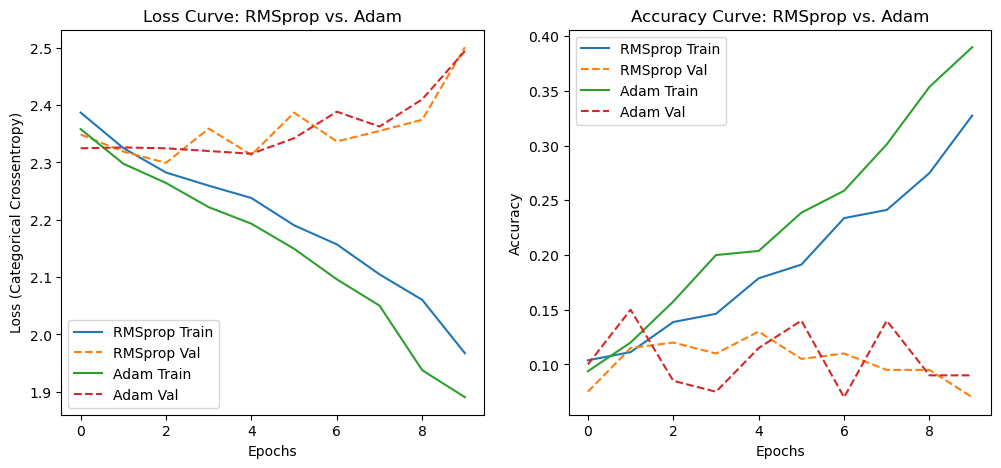

Final Validation Accuracy with RMSprop: 0.0700
Final Validation Accuracy with Adam: 0.0900


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

num_samples = 1000
num_classes = 10

X = np.random.randint(0, 256, size=(num_samples, 784)).astype(np.float32)  
X /= 255.0 
y = np.random.randint(0, num_classes, size=(num_samples, 1))

encoder = OneHotEncoder(sparse_output=False, categories=[range(num_classes)])
y_one_hot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

print(f"✅ Dataset Loaded: {X.shape[0]} samples, {X.shape[1]} features.")

def create_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=(784,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax") 
    ])
    return model

optimizers = {"RMSprop": keras.optimizers.RMSprop(), "Adam": keras.optimizers.Adam()}
history_dict = {}

for name, optimizer in optimizers.items():
    print(f"\n Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    history_dict[name] = history


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history.history["loss"], label=f"{name} Train")
    plt.plot(history.history["val_loss"], linestyle="dashed", label=f"{name} Val")
plt.xlabel("Epochs")
plt.ylabel("Loss (Categorical Crossentropy)")
plt.title("Loss Curve: RMSprop vs. Adam")
plt.legend()

plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history.history["accuracy"], label=f"{name} Train")
    plt.plot(history.history["val_accuracy"], linestyle="dashed", label=f"{name} Val")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve: RMSprop vs. Adam")
plt.legend()

plt.show()


for name, history in history_dict.items():
    final_acc = history.history["val_accuracy"][-1]
    print(f"Final Validation Accuracy with {name}: {final_acc:.4f}")
